<img src="images/logistic_regression.png" alt="drawing" width="1000"/>

# **Logistic Regression**

In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, RocCurveDisplay, roc_curve, PrecisionRecallDisplay


## Hearing Test

In [300]:
hearing = pd.read_csv('data/hearing_test.csv')
hearing.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### Data Analysis

First some data analysis and visualization is done to understand the data better. From the scatter plot (top right) and two dimensional histogram (bottom right) it can be seen that there is a negative correlation between age and the physical health, which is expected: the older you get the less active you become. From these plots it can also be seen that typically people are relatively young and healthy if they pass the test. 

The distributions of the age and physical_score can be well observed in the one dimensional histograms (bottom left & bottom center). For age there is still a significant overlap, but especially with physical score there is a clear distinction; the latter can also be seen in the boxplot (top center).

The correlation matrix shows that there is a strong correlation between the age and the test_score (0.68), but an even stronger correlation between the physical_score and the test_score (0.79).

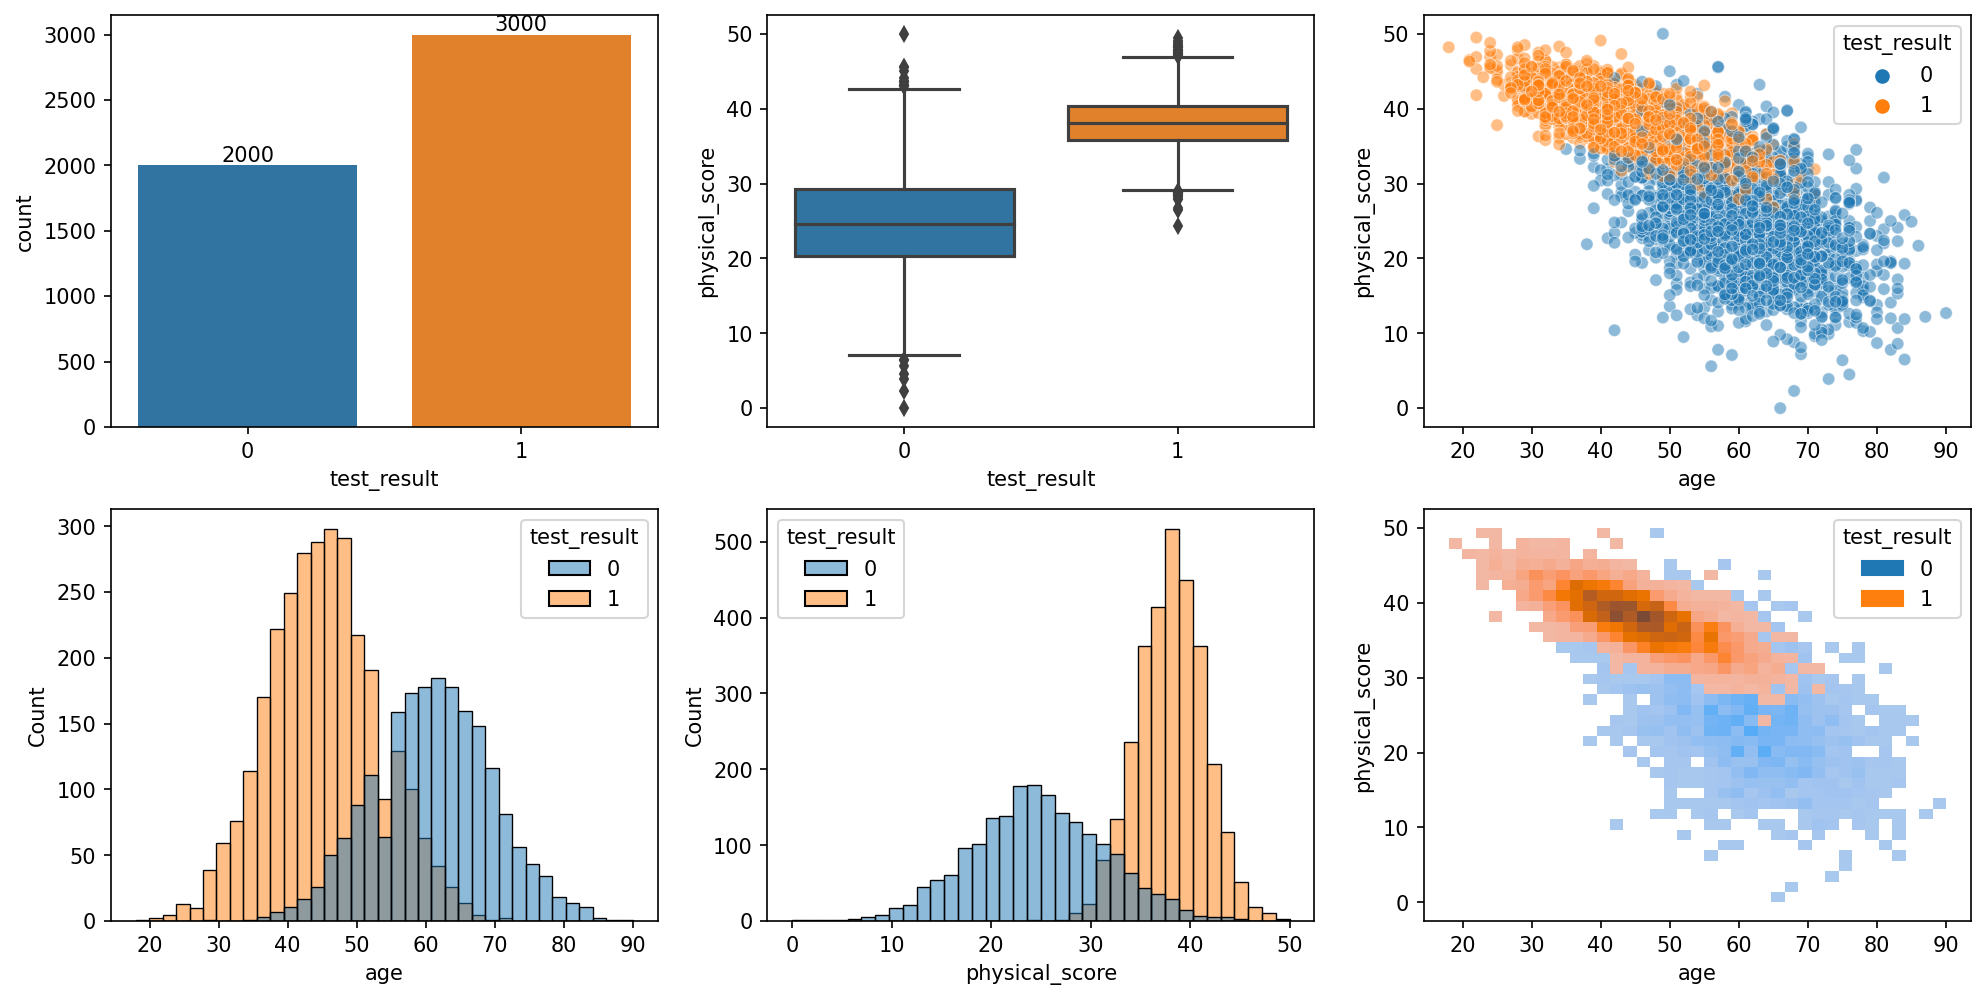

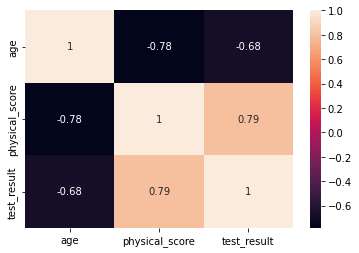

In [301]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), dpi=150)

sns.countplot(hearing, x='test_result', ax=ax[0][0])
sns.boxplot(hearing, x='test_result', y='physical_score', ax=ax[0][1])
sns.scatterplot(hearing, x='age', y='physical_score', hue='test_result', alpha=0.5, ax=ax[0][2])
sns.histplot(hearing, x='age', hue='test_result', ax=ax[1][0])
sns.histplot(hearing, x='physical_score', hue='test_result', ax=ax[1][1])
sns.histplot(hearing, x='age', y='physical_score', hue='test_result', ax=ax[1][2])

ax[0][0].bar_label(ax[0][0].containers[0])
plt.show()

sns.heatmap(hearing.corr(), annot=True)
plt.show()

### Data Preperation

The standard train-test split is performed and the data is scaled in order to improve model convergence. A smaller <code>test_size</code> ratio is used as the data set is relatively large. 

In [302]:
X = hearing.drop('test_result', axis=1)
y = hearing['test_result']

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Predictive Model

From the scikit learn documentation for the <code>LogisticRegression</code> class the probability of a positive classification is given by

$\hat p = \frac{1}{1 + e^{w_0 + Xw}}$

And the minimization function is in the form of

$C \sum (-y \log(\hat p) - (1-y)\log(1-\hat p))    + r(w)$

Where 

$y$ = true response

$X$ = feature data

$\hat p$ = estimated probability

$w$ = estimation coefficient

$r(w)$ = regularization term


---

For the regularization term there are 4 possible options

None = $0$

L1 = $|w|$

L2 = $\frac{1}{2} w^2$

Elastic Net = $\frac{1-\rho}{2} w^2 + \rho |w|$

In [304]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [305]:
model.coef_

array([[-0.94953524,  3.45991194]])

The <code>predict_proba</code> function returns the actual probabilities of the classifications

In [306]:
y_pred = model.predict_proba(X_test)
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

The <code>predict</code> function returns the predicted classification in binary

In [307]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

### Performance Metrics

The <code> ConfusionMatrixDisplay </code> class can be used to display the confusion matrix (number of True/False Positives/Negatives). There is an option to normalize the data to get a clear picture how well the model performed.

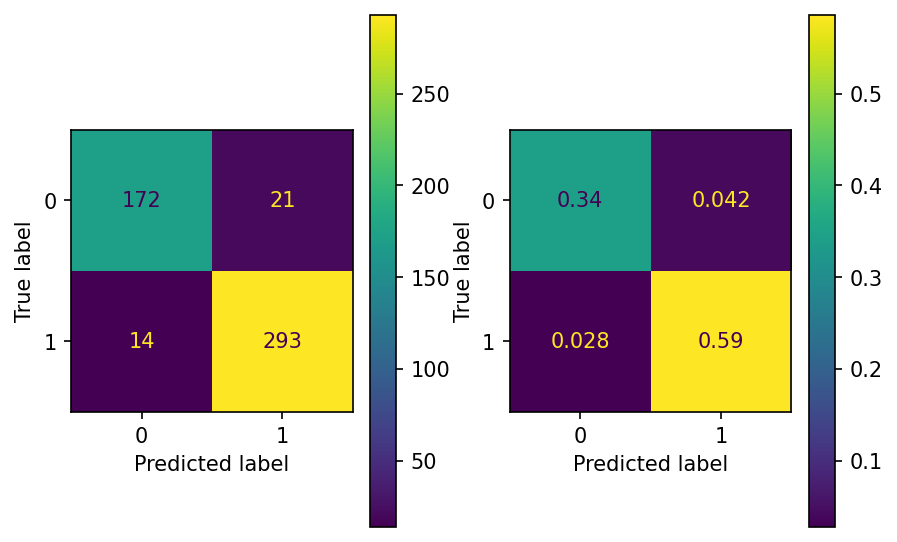

In [308]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1, 2, dpi=150)
fig.tight_layout()

ConfusionMatrixDisplay(cm).from_predictions(y_test, y_pred, ax=ax[0])                         
ConfusionMatrixDisplay(cm).from_estimator(model, X_test, y_test, normalize='all', ax=ax[1])  # normalized

The <code>classification_report</code> returns a string displaying the scores for several performance metrics

In [309]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



The ROC Curve and Precision-Recall Curve can be shown using the <code>RocCurveDisplay</code> and <code>PrecisionRecallDisplay</code> respectively

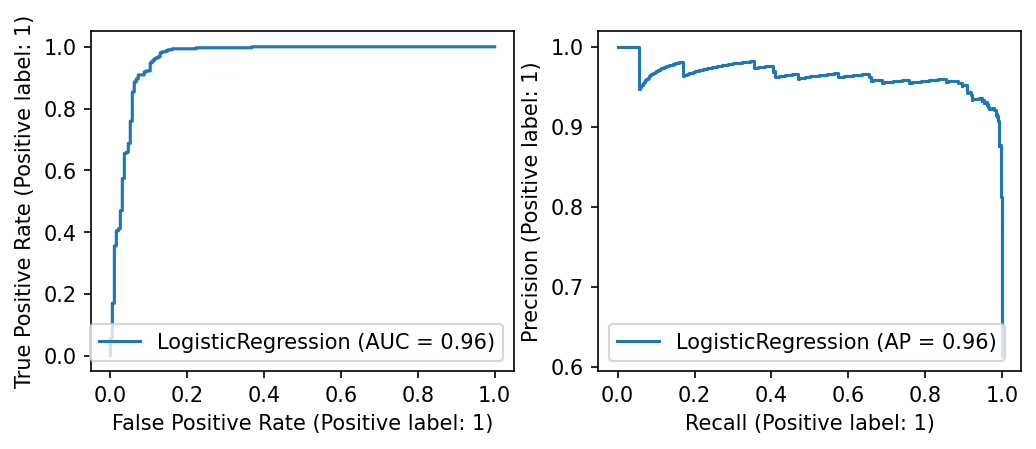

In [310]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=150)
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax[0])
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax[1])

## Flower Classification (Iris)

In [311]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Analysis

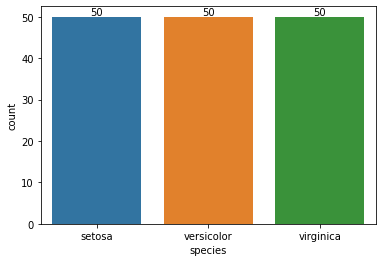

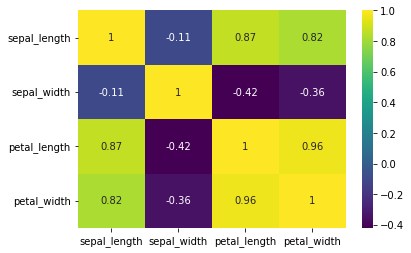

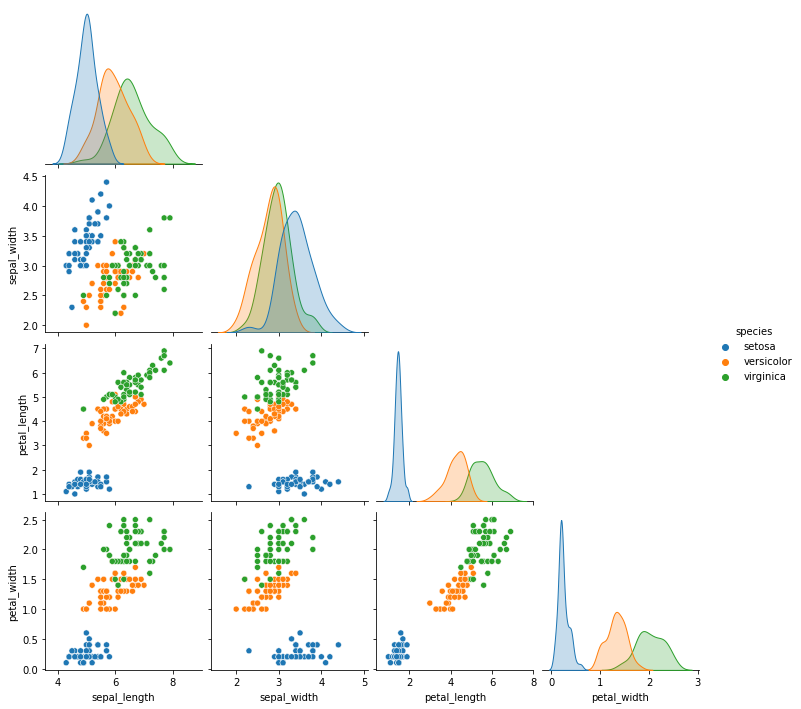

In [312]:
ax = sns.countplot(iris, x='species')
ax.bar_label(ax.containers[0])
plt.show()

sns.heatmap(iris.corr(), annot=True, cmap='viridis')
plt.show()

sns.pairplot(iris, hue='species', corner=True)





Scikit learn is ok with classifications to be strings (no encoding needed)

In [313]:
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


When doing multi-class logistic regression one way to do it is by seperating out each class one by one, this is called the One Versus Rest


Stochastic Average Gradient

There are different solvers


In [314]:
model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=1_000)

In [315]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

hyperparameters = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [316]:
grid = GridSearchCV(model, param_grid=hyperparameters)

In [317]:
import warnings
warnings.filterwarnings(action='once')
grid.fit(X_train, y_train)

C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Gebruiker\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is

GridSearchCV(estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

l1 ratio of 0 means it did not incorporate any l2 regularization

In [318]:
grid.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [319]:
y_pred = grid.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

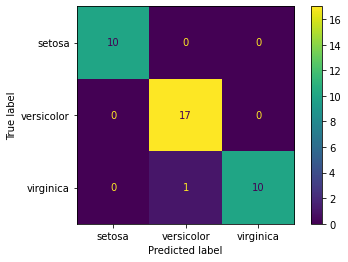

In [320]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [321]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



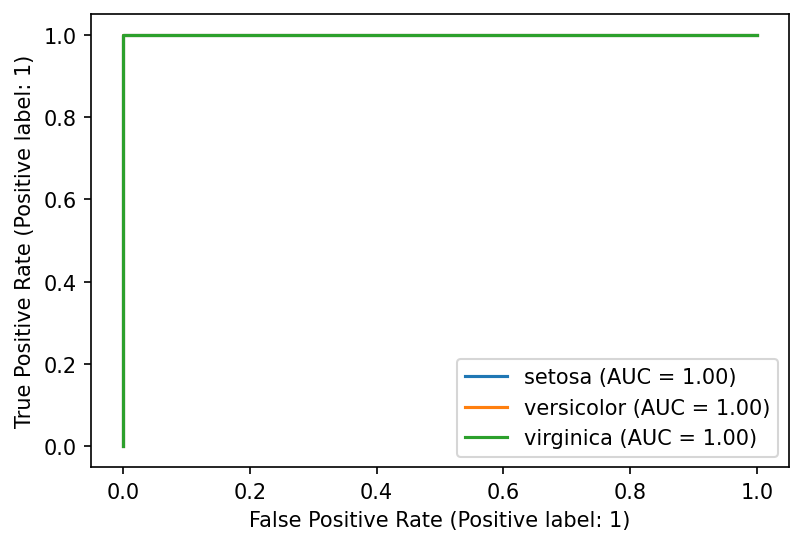

In [322]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer().fit(y_train)

y_test_binary = binarizer.transform(y_test)
y_prob = grid.predict_proba(X_test)

fig, ax = plt.subplots(dpi=150)

for flower_type in y.unique():
    flower_encoding = binarizer.transform([flower_type])[0]
    flower_idx = np.where(flower_encoding == 1)[0][0]
    
    y_true = y_test_binary[:, flower_idx]
    y_pred = y_prob[:, flower_idx]
    
    RocCurveDisplay.from_predictions(y_true, y_pred, name=flower_type, ax=ax)
    



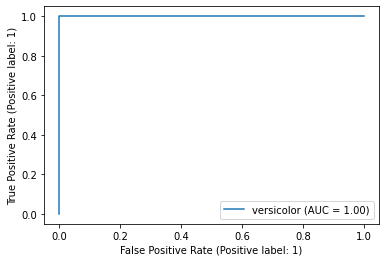

,True,Predicted
0,0,0.008104
1,0,0.009205
2,0,0.027495
3,0,0.450770
4,1,0.987748
5,0,0.306667
6,1,0.691180
7,1,0.989939
8,0,0.334560
9,0,0.189109


In [323]:
flower_type = 'versicolor'
flower_encoding = binarizer.transform([flower_type])[0]
flower_idx = np.where(flower_encoding == 1)[0][0]

y_true = y_test_binary[:, flower_idx]
y_pred = y_prob[:, flower_idx]

RocCurveDisplay.from_predictions(y_true, y_pred, name=flower_type)
plt.show()

pd.DataFrame({'True': y_true, 'Predicted': y_pred})

In [324]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [325]:
a[0, 1]

2

In [326]:
a[:, 2]

array([3, 6, 9])